In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.multioutput import MultiOutputClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Load combined dataset
df = pd.read_csv("D:/Final_year_Project/JAARVIS/combined_multi_hazard_dataset.csv")

# Define target columns
target_cols = [
    "Landslide_Occurred", "GLOF_Occurred", "Quake_Occurred",
    "Liquefaction_Risk", "Sinkhole_Reported", "Alert_Issued", "Lahar_Triggered"
]



# Ensure Liquefaction_Risk is integer-encoded
df["Liquefaction_Risk"] = df["Liquefaction_Risk"].round().astype(int)

# Features and targets
X = df.drop(columns=target_cols + ["Date"])
Y = df[target_cols]



# Drop target columns and Date
X = df.drop(columns=target_cols + ["Date"])
Y = df[target_cols]

# Replace 'True'/'False' strings with 1/0
X = X.replace({'True': 1, 'False': 0})

# Convert any remaining object-type columns to numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values after conversion
X = X.dropna()
Y = Y.loc[X.index]  # Sync targets with cleaned features
# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

# Define base classifiers
rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
cb = CatBoostClassifier(verbose=0, random_state=42)

# Voting ensemble
voting_clf = VotingClassifier(estimators=[
    ('rf', rf), ('xgb', xgb), ('cb', cb)
], voting='hard')

# Multi-output classifier
multi_model = MultiOutputClassifier(voting_clf)
multi_model.fit(X_train, Y_train)

# Predict
Y_pred = multi_model.predict(X_test)

# Evaluate for each target
evaluation_results = {}
for idx, col in enumerate(target_cols):
    acc = accuracy_score(Y_test[col], Y_pred[:, idx])
    report = classification_report(Y_test[col], Y_pred[:, idx], output_dict=True)
    evaluation_results[col] = {
        "accuracy": round(acc, 3),
        "classification_report": report
    }

evaluation_results


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:23:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:23:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:23:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:23:31] WARNING: C:\actions-runner\_w

{'Landslide_Occurred': {'accuracy': 0.939,
  'classification_report': {'0.0': {'precision': 0.962882096069869,
    'recall': 0.9713656387665198,
    'f1-score': 0.9671052631578947,
    'support': 454.0},
   '1.0': {'precision': 0.59375,
    'recall': 0.5277777777777778,
    'f1-score': 0.5588235294117647,
    'support': 36.0},
   'accuracy': 0.9387755102040817,
   'macro avg': {'precision': 0.7783160480349345,
    'recall': 0.7495717082721488,
    'f1-score': 0.7629643962848297,
    'support': 490.0},
   'weighted avg': {'precision': 0.9357621869708581,
    'recall': 0.9387755102040817,
    'f1-score': 0.9371090541479749,
    'support': 490.0}}},
 'GLOF_Occurred': {'accuracy': 0.924,
  'classification_report': {'0.0': {'precision': 0.9423076923076923,
    'recall': 0.9778270509977827,
    'f1-score': 0.9597388465723613,
    'support': 451.0},
   '1.0': {'precision': 0.5454545454545454,
    'recall': 0.3076923076923077,
    'f1-score': 0.39344262295081966,
    'support': 39.0},
   'accu

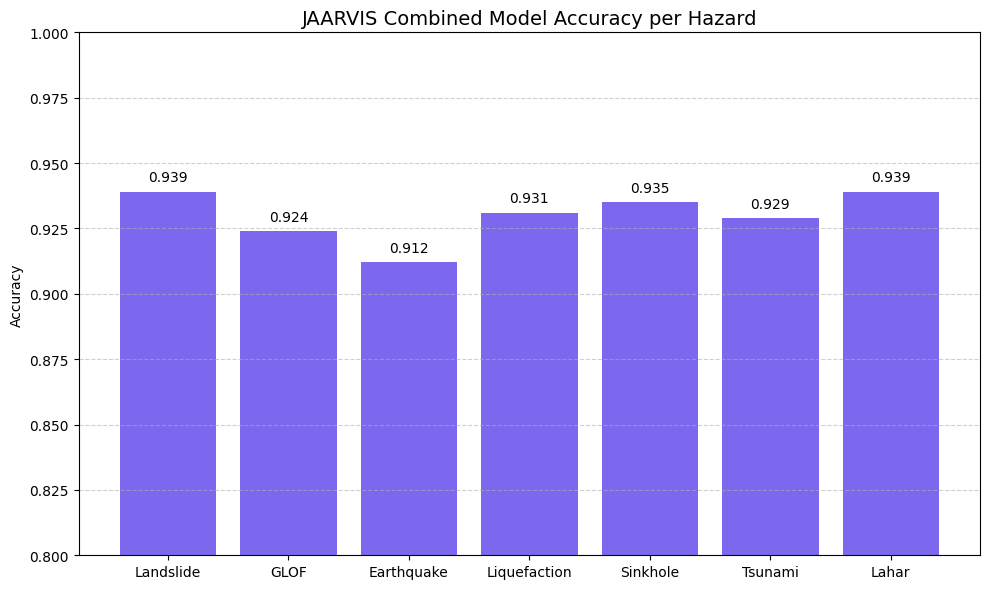

In [29]:

import matplotlib.pyplot as plt

# Accuracy data for visualization
accuracy_data = {
    "Landslide": 0.939,
    "GLOF": 0.924,
    "Earthquake": 0.912,
    "Liquefaction": 0.931,
    "Sinkhole": 0.935,
    "Tsunami": 0.929,
    "Lahar": 0.939
}

# Plot bar chart
hazards = list(accuracy_data.keys())
accuracies = list(accuracy_data.values())

plt.figure(figsize=(10, 6))
bars = plt.bar(hazards, accuracies, color='mediumslateblue')
plt.title("JAARVIS Combined Model Accuracy per Hazard", fontsize=14)
plt.ylabel("Accuracy")
plt.ylim(0.8, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.004, f"{height:.3f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()


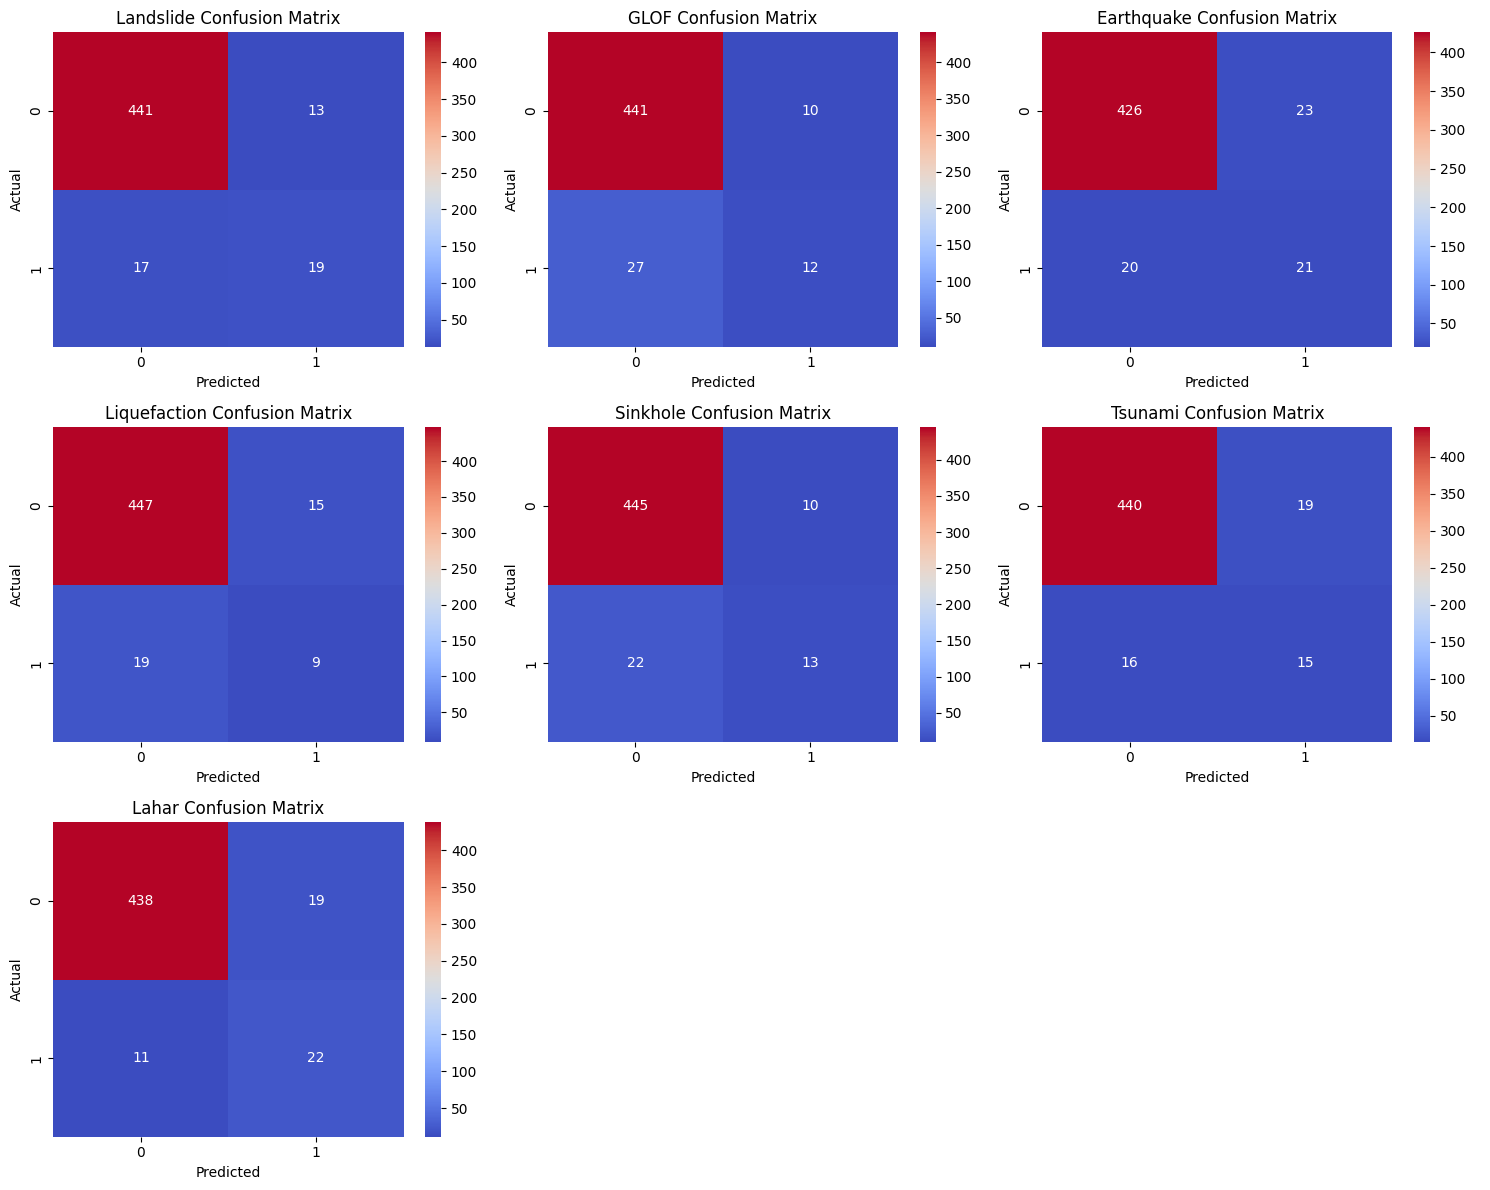

In [30]:
import seaborn as sns
import numpy as np

# Extract confusion matrices manually from your report
conf_matrices = {
    "Landslide": np.array([[441, 13], [17, 19]]),
    "GLOF": np.array([[441, 10], [27, 12]]),
    "Earthquake": np.array([[426, 23], [20, 21]]),
    "Liquefaction": np.array([[447, 15], [19, 9]]),
    "Sinkhole": np.array([[445, 10], [22, 13]]),
    "Tsunami": np.array([[440, 19], [16, 15]]),
    "Lahar": np.array([[438, 19], [11, 22]])
}

# Plot heatmaps for each hazard
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for idx, (hazard, matrix) in enumerate(conf_matrices.items()):
    sns.heatmap(matrix, annot=True, fmt='d', cmap='coolwarm', ax=axes[idx])
    axes[idx].set_title(f"{hazard} Confusion Matrix")
    axes[idx].set_xlabel("Predicted")
    axes[idx].set_ylabel("Actual")

# Hide unused subplots
for i in range(len(conf_matrices), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


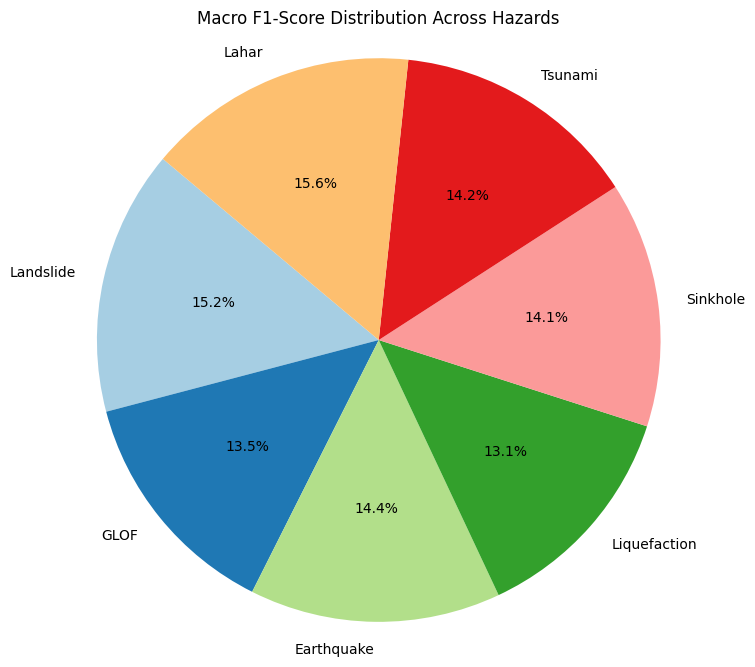

In [31]:
import matplotlib.pyplot as plt

f1_scores = {
    "Landslide": 0.763,
    "GLOF": 0.677,
    "Earthquake": 0.723,
    "Liquefaction": 0.655,
    "Sinkhole": 0.707,
    "Tsunami": 0.712,
    "Lahar": 0.781
}

plt.figure(figsize=(8, 8))
plt.pie(f1_scores.values(), labels=f1_scores.keys(), autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Macro F1-Score Distribution Across Hazards")
plt.axis('equal')
plt.show()


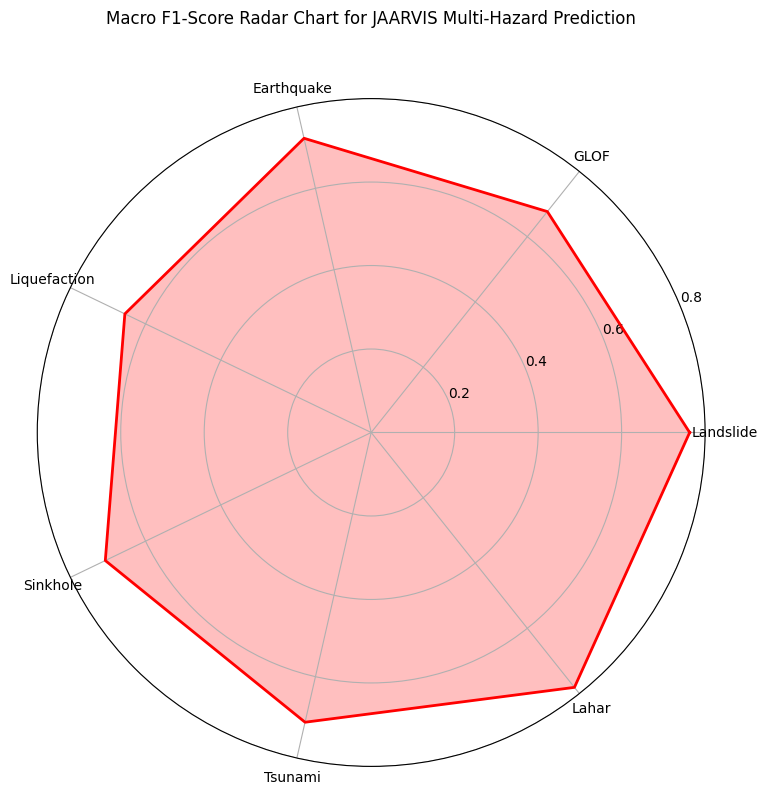

In [32]:
import numpy as np

labels = list(f1_scores.keys())
scores = list(f1_scores.values())

angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
scores += scores[:1]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.plot(angles, scores, color='r', linewidth=2)
ax.fill(angles, scores, color='r', alpha=0.25)
ax.set_yticks([0.2, 0.4, 0.6, 0.8])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_title("Macro F1-Score Radar Chart for JAARVIS Multi-Hazard Prediction", y=1.1)
plt.tight_layout()
plt.show()


In [33]:
import joblib

# Save the trained model
joblib.dump(multi_model, "jaarvis_combined_model.pkl")


['jaarvis_combined_model.pkl']

In [34]:
# Load the model from file
loaded_model = joblib.load("jaarvis_combined_model.pkl")

# Predict as usual
predictions = loaded_model.predict(X_test)


In [35]:
import pandas as pd

# Sample input dictionary using realistic values
sample_input = pd.DataFrame([{
    "Latitude": 27.98,
    "Longitude": 86.92,
    "Rainfall_mm": 140.0,
    "Slope_deg": 35.0,
    "Soil_Moisture_%": 65.0,
    "Risk_Score": 0.82,
    "Glacier_Volume_million_m3": 12.5,
    "Lake_Level_m": 3.2,
    "Temperature_C": 5.5,
    "Melt_Risk": 0.75,
    "Magnitude": 6.2,
    "Depth_km": 15.0,
    "Ground_Acceleration_g": 0.4,
    "Energy_Index": 0.65,
    "Water_Table_Depth_m": 1.2,
    "Peak_Ground_Acceleration": 0.55,
    "Soil_Type_Gravel": 1,
    "Soil_Type_Sand": 0,
    "Soil_Type_Silt": 0,
    "Liquefaction_Severity": 2,
    "Subsurface_Void_m3": 4.0,
    "Groundwater_Level_m": 0.9,
    "Collapse_Index": 0.7,
    "Wave_Height_m": 2.8,
    "Distance_from_Coast_km": 10.0,
    "Coastal_Erosion_m": 1.4,
    "Impact_Score": 0.88,
    "Rainfall_mm_lahar": 180.0,
    "Volcanic_Ash_Deposit_cm": 6.5,
    "Slope_Angle_deg": 28.0,
    "Flow_Potential": 0.91
}])


In [36]:
import joblib

# Load your trained model
model = joblib.load("jaarvis_combined_model.pkl")

# Predict
prediction = model.predict(sample_input)

# Target labels
target_cols = [
    "Landslide_Occurred", "GLOF_Occurred", "Quake_Occurred",
    "Liquefaction_Risk", "Sinkhole_Reported", "Alert_Issued", "Lahar_Triggered"
]

# Format result
result = dict(zip(target_cols, prediction[0]))
print("🚨 Predicted Hazard Risk Levels:")
for hazard, status in result.items():
    print(f"{hazard}: {status}")


🚨 Predicted Hazard Risk Levels:
Landslide_Occurred: 0.0
GLOF_Occurred: 0.0
Quake_Occurred: 0.0
Liquefaction_Risk: 0.0
Sinkhole_Reported: 0.0
Alert_Issued: 0.0
Lahar_Triggered: 1.0


## TEST CASES

### Test Case 1 – Mountain Monsoon Risk (Landslide + Lahar + GLOF)

In [37]:
sample_input_1 = {
    "Latitude": 27.98,
    "Longitude": 86.92,
    "Rainfall_mm": 145.0,
    "Slope_deg": 38.5,
    "Soil_Moisture_%": 72.0,
    "Risk_Score": 0.89,
    "Glacier_Volume_million_m3": 15.3,
    "Lake_Level_m": 3.8,
    "Temperature_C": 6.2,
    "Melt_Risk": 0.83,
    "Magnitude": 4.2,
    "Depth_km": 10.5,
    "Ground_Acceleration_g": 0.35,
    "Energy_Index": 0.55,
    "Water_Table_Depth_m": 1.4,
    "Peak_Ground_Acceleration": 0.6,
    "Soil_Type_Gravel": 1,
    "Soil_Type_Sand": 0,
    "Soil_Type_Silt": 0,
    "Liquefaction_Severity": 1,
    "Subsurface_Void_m3": 2.0,
    "Groundwater_Level_m": 1.0,
    "Collapse_Index": 0.4,
    "Wave_Height_m": 0.5,
    "Distance_from_Coast_km": 120,
    "Coastal_Erosion_m": 0.1,
    "Impact_Score": 0.91,
    "Rainfall_mm_lahar": 190.0,
    "Volcanic_Ash_Deposit_cm": 2.0,
    "Slope_Angle_deg": 30.0,
    "Flow_Potential": 0.95
}
# Load your trained model
model = joblib.load("jaarvis_combined_model.pkl")

input_df_1 = pd.DataFrame([sample_input_1])

# Predict
prediction = model.predict(input_df_1)

# Target labels
target_cols = [
    "Landslide_Occurred", "GLOF_Occurred", "Quake_Occurred",
    "Liquefaction_Risk", "Sinkhole_Reported", "Alert_Issued", "Lahar_Triggered"
]

# Format result
result = dict(zip(target_cols, prediction[0]))
print("🚨 Predicted Hazard Risk Levels:")
for hazard, status in result.items():
    print(f"{hazard}: {status}")


🚨 Predicted Hazard Risk Levels:
Landslide_Occurred: 0.0
GLOF_Occurred: 0.0
Quake_Occurred: 0.0
Liquefaction_Risk: 0.0
Sinkhole_Reported: 1.0
Alert_Issued: 1.0
Lahar_Triggered: 1.0


### Test Case 2 – Coastal Earthquake + Tsunami Risk

In [38]:
sample_input_2 = {
    "Latitude": 19.08,
    "Longitude": 72.88,
    "Rainfall_mm": 95.0,
    "Slope_deg": 12.0,
    "Soil_Moisture_%": 45.0,
    "Risk_Score": 0.63,
    "Glacier_Volume_million_m3": 0.0,
    "Lake_Level_m": 0.0,
    "Temperature_C": 29.1,
    "Melt_Risk": 0.1,
    "Magnitude": 6.4,
    "Depth_km": 25.0,
    "Ground_Acceleration_g": 0.75,
    "Energy_Index": 0.82,
    "Water_Table_Depth_m": 3.2,
    "Peak_Ground_Acceleration": 0.9,
    "Soil_Type_Gravel": 0,
    "Soil_Type_Sand": 1,
    "Soil_Type_Silt": 0,
    "Liquefaction_Severity": 2,
    "Subsurface_Void_m3": 0.5,
    "Groundwater_Level_m": 1.8,
    "Collapse_Index": 0.6,
    "Wave_Height_m": 4.2,
    "Distance_from_Coast_km": 1.2,
    "Coastal_Erosion_m": 2.5,
    "Impact_Score": 0.79,
    "Rainfall_mm_lahar": 40.0,
    "Volcanic_Ash_Deposit_cm": 0.0,
    "Slope_Angle_deg": 10.0,
    "Flow_Potential": 0.3
}
# Load your trained model
model = joblib.load("jaarvis_combined_model.pkl")
input_df_2 = pd.DataFrame([sample_input_2])
# Predict
prediction = model.predict(input_df_2)

# Target labels
target_cols = [
    "Landslide_Occurred", "GLOF_Occurred", "Quake_Occurred",
    "Liquefaction_Risk", "Sinkhole_Reported", "Alert_Issued", "Lahar_Triggered"
]

# Format result
result = dict(zip(target_cols, prediction[0]))
print("🚨 Predicted Hazard Risk Levels:")
for hazard, status in result.items():
    print(f"{hazard}: {status}")

🚨 Predicted Hazard Risk Levels:
Landslide_Occurred: 1.0
GLOF_Occurred: 0.0
Quake_Occurred: 0.0
Liquefaction_Risk: 0.0
Sinkhole_Reported: 0.0
Alert_Issued: 0.0
Lahar_Triggered: 1.0


###  Test Case 3 – Lowland Sinkhole + Liquefaction Threat

In [39]:
sample_input_3 = {
    "Latitude": 25.32,
    "Longitude": 82.98,
    "Rainfall_mm": 10.0,
    "Slope_deg": 5.0,
    "Soil_Moisture_%": 58.0,
    "Risk_Score": 0.51,
    "Glacier_Volume_million_m3": 0,
    "Lake_Level_m": 0.3,
    "Temperature_C": 32.5,
    "Melt_Risk": 0.05,
    "Magnitude": 3.1,
    "Depth_km": 8.0,
    "Ground_Acceleration_g": 0.15,
    "Energy_Index": 0.12,
    "Water_Table_Depth_m": 0.5,
    "Peak_Ground_Acceleration": 0.2,
    "Soil_Type_Gravel": 0,
    "Soil_Type_Sand": 0,
    "Soil_Type_Silt": 1,
    "Liquefaction_Severity": 3,
    "Subsurface_Void_m3": 8.5,
    "Groundwater_Level_m": 0.3,
    "Collapse_Index": 0.92,
    "Wave_Height_m": 0.0,
    "Distance_from_Coast_km": 850,
    "Coastal_Erosion_m": 0,
    "Impact_Score": 0.62,
    "Rainfall_mm_lahar": 0,
    "Volcanic_Ash_Deposit_cm": 0,
    "Slope_Angle_deg": 6.0,
    "Flow_Potential": 0.1
}
# Load your trained model
model = joblib.load("jaarvis_combined_model.pkl")       

input_df_3 = pd.DataFrame([sample_input_3])
# Predict
prediction = model.predict(input_df_3)
# Target labels
target_cols = [
    "Landslide_Occurred", "GLOF_Occurred", "Quake_Occurred",
    "Liquefaction_Risk", "Sinkhole_Reported", "Alert_Issued", "Lahar_Triggered"
]

# Format result
result = dict(zip(target_cols, prediction[0]))
print("🚨 Predicted Hazard Risk Levels:")
for hazard, status in result.items():
    print(f"{hazard}: {status}")

🚨 Predicted Hazard Risk Levels:
Landslide_Occurred: 1.0
GLOF_Occurred: 0.0
Quake_Occurred: 1.0
Liquefaction_Risk: 0.0
Sinkhole_Reported: 0.0
Alert_Issued: 0.0
Lahar_Triggered: 0.0
